In [5]:
import os
import numpy as np
import pandas as pd

os.chdir(r"/Users/sanghyuk/Documents/preprocessing_python/lecture_source/2. 탐색적 데이터 분석/데이터/AB테스트")

#### Step 1. 현황 분석

In [7]:
df = pd.read_csv("일별현황데이터.csv", engine = "python", encoding='CP949')

In [8]:
df.head()

,구매자수,방문자수,일자,총 판매 금액
0,328,1498,2019-01-01,6454056
1,301,1514,2019-01-02,5941439
2,219,1409,2019-01-03,3967404
3,276,1617,2019-01-04,5073708
4,311,1482,2019-01-05,6482795


In [10]:
df.describe()

,구매자수,방문자수,총 판매 금액
count,365.000000,365.000000,3.650000e+02
mean,298.347945,1502.024658,5.983674e+06
std,54.205014,52.454239,1.129601e+06
min,108.000000,1370.000000,2.002536e+06
25%,262.000000,1466.000000,5.222217e+06
50%,297.000000,1500.000000,5.990007e+06
75%,337.000000,1537.000000,6.734271e+06
max,444.000000,1638.000000,9.318244e+06


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)

([<matplotlib.axis.XTick at 0x7fd967feb340>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

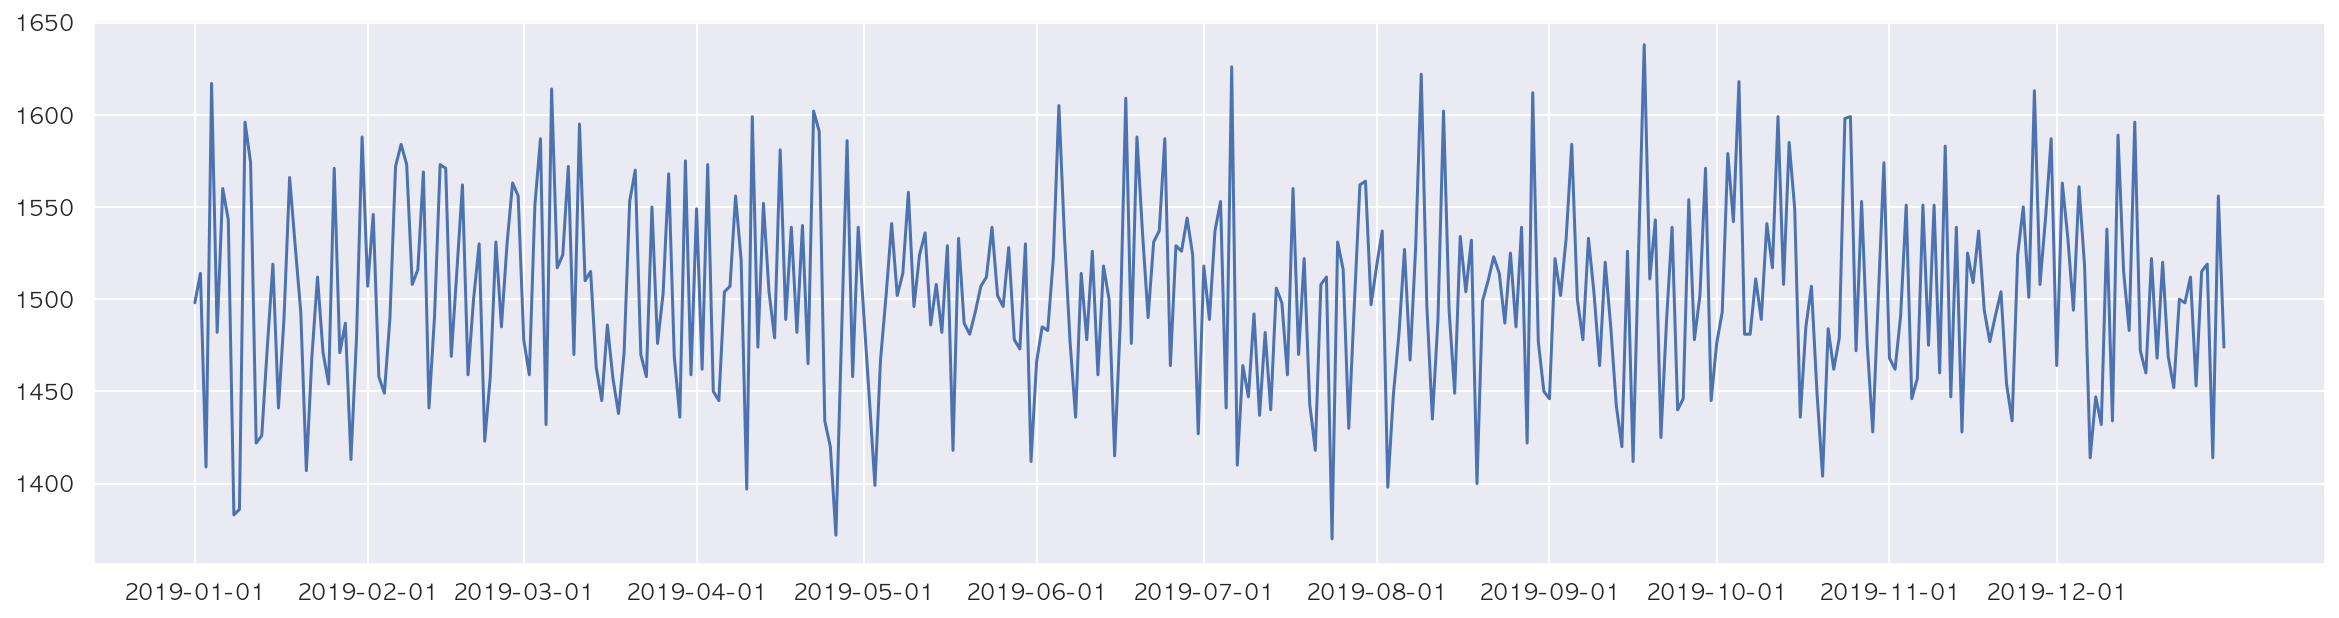

In [13]:
plt.plot(df['일자'], df['방문자수'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

([<matplotlib.axis.XTick at 0x7fd969f440d0>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

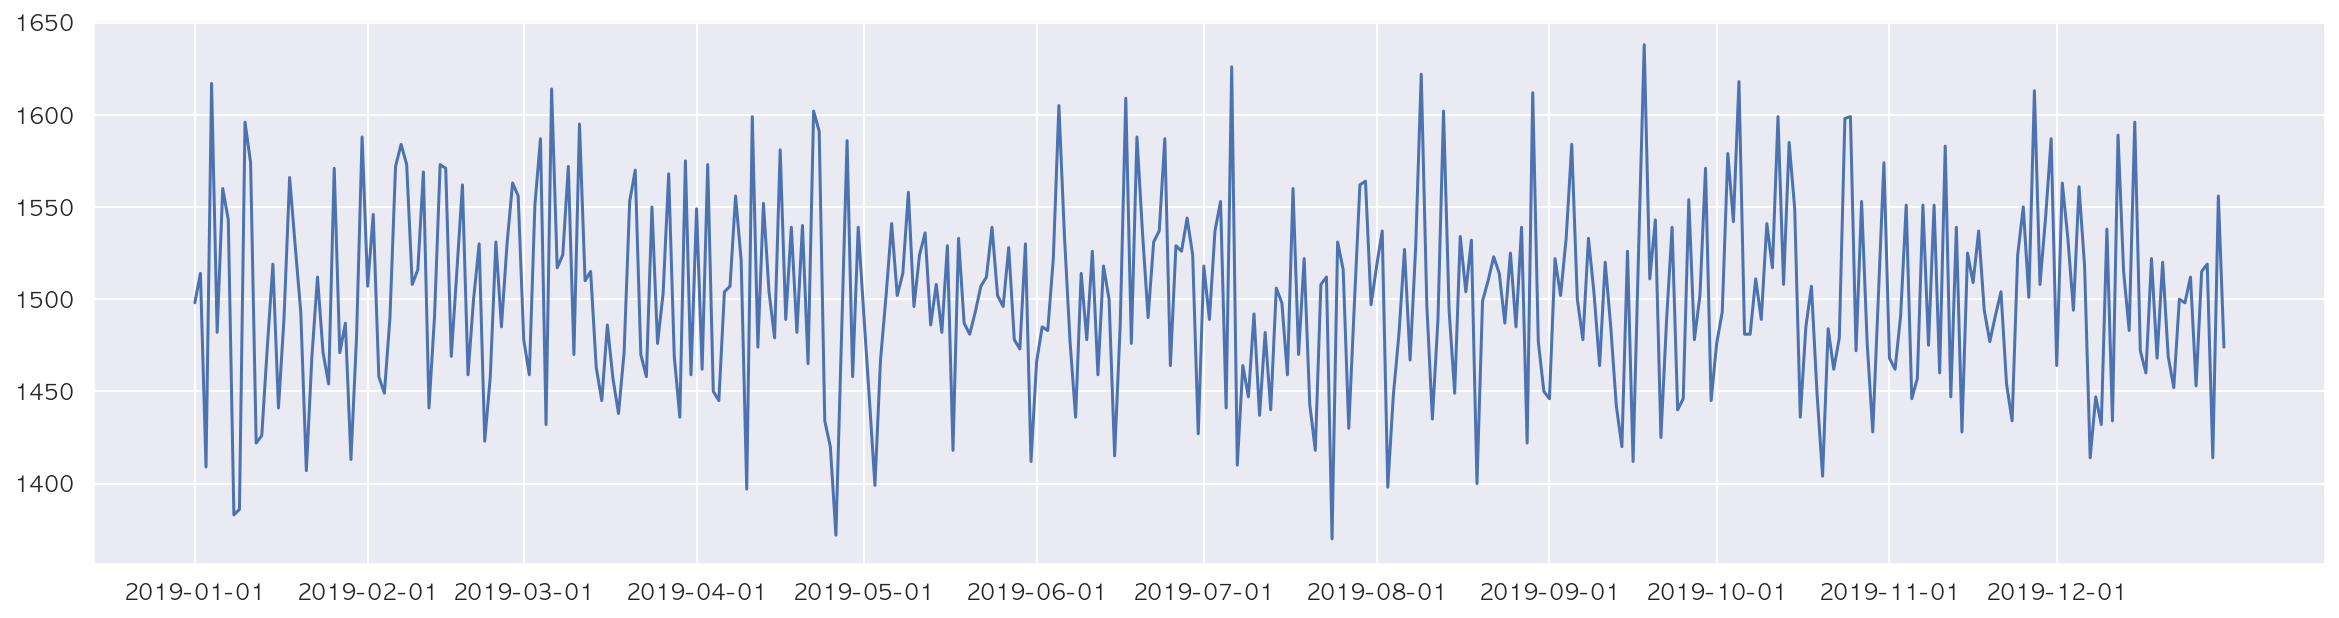

In [15]:
plt.plot(df['일자'], df['방문자수'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

([<matplotlib.axis.XTick at 0x7fd969e11070>,
 [Text(0, 0, '2019-01-01'),
  Text(31, 0, '2019-02-01'),
  Text(59, 0, '2019-03-01'),
  Text(90, 0, '2019-04-01'),
  Text(120, 0, '2019-05-01'),
  Text(151, 0, '2019-06-01'),
  Text(181, 0, '2019-07-01'),
  Text(212, 0, '2019-08-01'),
  Text(243, 0, '2019-09-01'),
  Text(273, 0, '2019-10-01'),
  Text(304, 0, '2019-11-01'),
  Text(334, 0, '2019-12-01')])

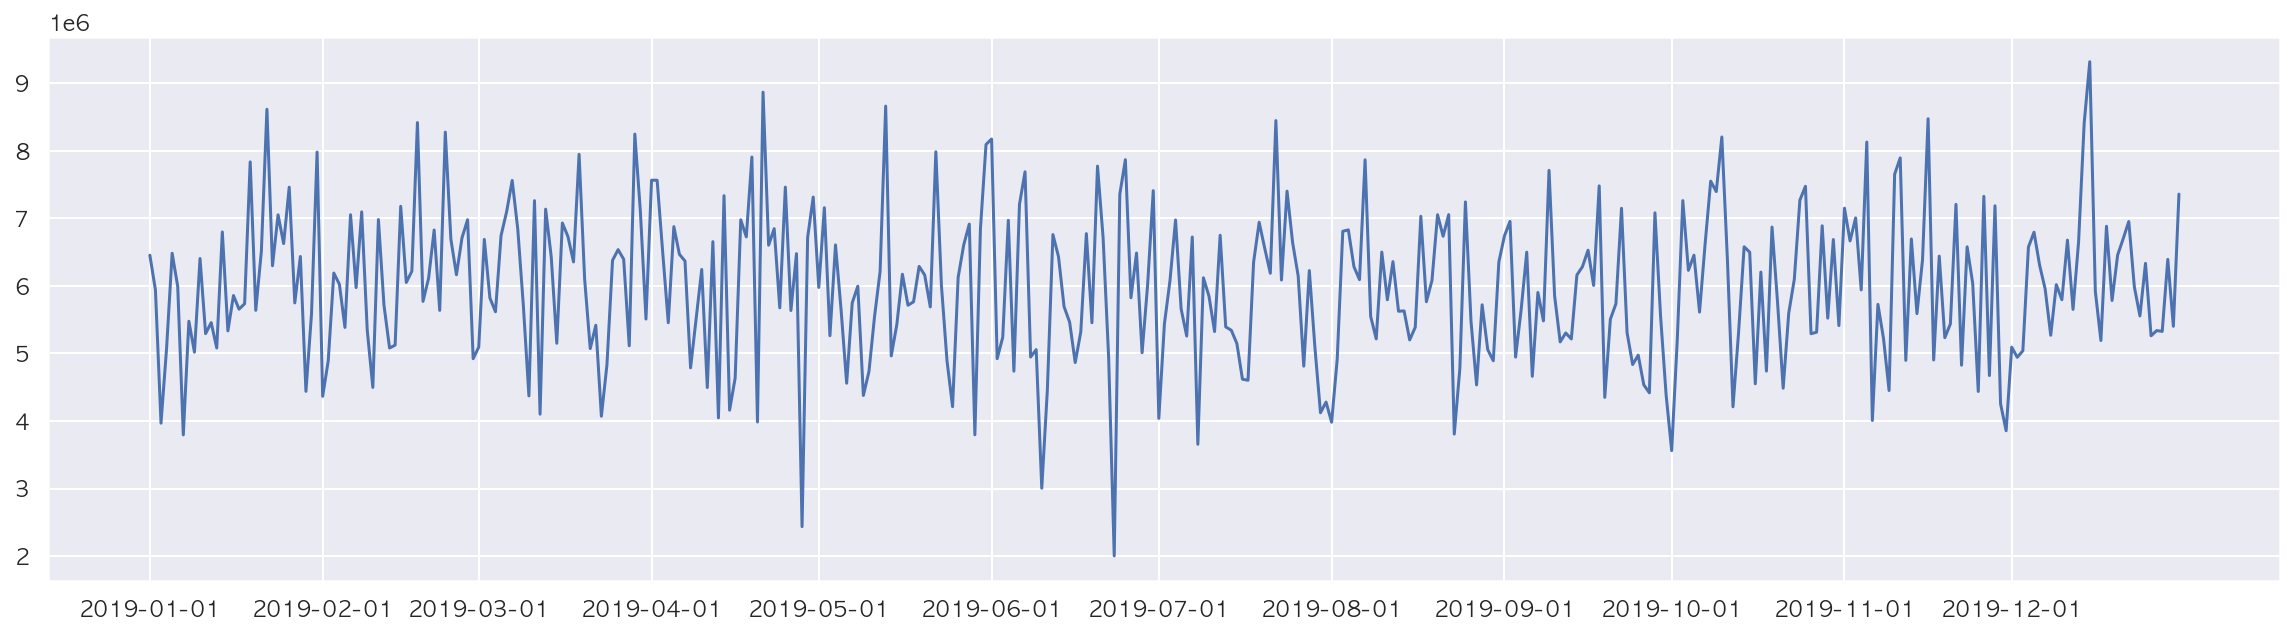

In [14]:
plt.plot(df['일자'], df['총 판매 금액'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

#### Step 2. 상품 배치와 상품 구매 금액에 따른 관계 분석

In [17]:
placement_A = pd.read_csv("상품배치_A.csv", engine = "python", index_col = "고객ID", encoding='CP949')
placement_A.head()

,구매금액
고객ID,
C-1,20459
C-2,0
C-3,19726
C-4,0
C-5,19049


In [18]:
placement_B = pd.read_csv("상품배치_B.csv", engine = "python", index_col = "고객ID", encoding='CP949')
placement_B.head()

,구매금액
고객ID,
C-200,0
C-201,0
C-202,0
C-203,19055
C-204,0


In [19]:
placement_C = pd.read_csv("상품배치_C.csv", engine = "python", index_col = "고객ID", encoding='CP949')
placement_C.head()

,구매금액
고객ID,
C-360,0
C-361,19844
C-362,19085
C-363,0
C-364,19671


구매금액이 0인 사람을 제외한 분석 수행

In [20]:
# 구매금액이 0인 사람과 관련된 데이터 필터링
placement_A_without_zero = placement_A.loc[placement_A['구매금액'] != 0]['구매금액'].values
placement_B_without_zero = placement_B.loc[placement_B['구매금액'] != 0]['구매금액'].values
placement_C_without_zero = placement_C.loc[placement_C['구매금액'] != 0]['구매금액'].values

In [21]:
placement_A_without_zero

array([20459, 19726, 19049, 20084, 21285, 20613, 20724, 19741, 20904,
       21149, 18413, 20677, 21404, 18858, 19411, 22192, 19355, 19495,
       17755, 18153, 19474, 20449, 18486, 19506, 16556, 19517, 18829,
       20436, 20334, 18465, 19985, 21761, 20064, 20032, 19972, 20734,
       19584, 19531, 19746, 19918, 19637, 20618, 19910, 19558, 21191,
       19376, 18158, 19121, 20905, 20437, 20921, 20519, 19659, 18555,
       21177, 20683, 20395, 19736, 21679, 21279, 21104, 22313, 19397,
       20507, 20300, 20551, 18567, 18703, 20523, 18809, 20092, 18230,
       20282, 20997, 20297, 19943, 21108, 18362, 21545, 19441, 22338,
       20800, 20113, 20097, 20454, 19894, 18728, 19011, 20189, 20239,
       18195, 21059, 20041, 21511, 20062, 18556, 19754, 21148, 20601,
       20463, 19419, 18669])

In [13]:
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *
print(kstest(placement_A_without_zero, 'norm'))
print(kstest(placement_B_without_zero, 'norm'))
print(kstest(placement_C_without_zero, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [14]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(placement_A_without_zero,
               placement_B_without_zero,
               placement_C_without_zero))

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)


In [23]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(placement_A_without_zero) + ['B'] * len(placement_B_without_zero) + ['C'] * len(placement_C_without_zero)
Data = placement_A_without_zero.tolist() + placement_B_without_zero.tolist() + placement_C_without_zero.tolist()

print(pairwise_tukeyhsd(Data, Group))

# (A, C) ~ B의 관계임을 확인

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     A      B -1883.1765 0.001 -2276.2766 -1490.0763   True
     A      C    66.7946   0.9  -343.9011   477.4903  False
     B      C  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


A와 C는 큰 차이가 없다는 뜻. 

구매금액 0을 포함하여 분석

In [27]:
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *
print(kstest(placement_A['구매금액'], 'norm'))
print(kstest(placement_B['구매금액'], 'norm'))
print(kstest(placement_C['구매금액'], 'norm'))

KstestResult(statistic=0.5151515151515151, pvalue=2.490817585851874e-49)
KstestResult(statistic=0.5, pvalue=1.6346312024307732e-37)
KstestResult(statistic=0.5, pvalue=9.71661593795993e-35)


In [28]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(placement_A['구매금액'],
               placement_B['구매금액'],
               placement_C['구매금액']))

F_onewayResult(statistic=3.9252421050200677, pvalue=0.020344882530536217)


In [18]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(placement_A) + ['B'] * len(placement_B) + ['C'] * len(placement_C)
Data = placement_A['구매금액'].tolist() + placement_B['구매금액'].tolist() + placement_C['구매금액'].tolist()

print(pairwise_tukeyhsd(Data, Group))

# A ~ (B, C) 관계임을 확인

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B -2602.2773 0.0314 -5020.3977 -184.1568   True
     A      C -2302.0043 0.0741 -4773.7489  169.7403  False
     B      C    300.273    0.9 -2293.9871  2894.533  False
-----------------------------------------------------------


이런 경우는 약간 묶기가 어렵긴 한다. 관계가 서로 이상하다. 

#### Step 2. 구매 여부와 상품 배치 간 관계 파악

In [30]:
# 데이터 변환
placement_A['상품배치'] = 'A'
placement_B['상품배치'] = 'B'
placement_C['상품배치'] = 'C'

placement = pd.concat([placement_A, placement_B, placement_C], axis = 0, ignore_index = False)
placement['구매여부'] = (placement['구매금액'] != 0).astype(int)
placement.head()

,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1


In [31]:
# 교차 테이블 생성
cross_table = pd.crosstab(placement['상품배치'], placement['구매여부'])
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


In [32]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # pvalue가 0.06으로 구매여부와 상품배치에는 관계가 있다고 보기 힘듦

0.0686402428247769


In [33]:
obs

array([[ 96, 102],
       [ 92,  68],
       [ 89,  59]])

In [34]:
# 기대값
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237


p-value에서는 큰 관계 있다고 보기 힘들긴 했으나, p-value가 작긴 하다. 그리고 실제로, table을 보더라도, A가 높긴 하다. 

#### Step 3. 사이트맵 구성에 따른 체류 시간 차이 분석

In [42]:
sitemap_A = pd.read_csv("사이트맵_A.csv", engine = "python", encoding='CP949')
sitemap_A.head()

,고객ID,체류시간(분)
0,C-508,9
1,C-509,8
2,C-510,7
3,C-511,9
4,C-512,10


In [43]:
sitemap_B = pd.read_csv("사이트맵_B.csv", engine = "python", encoding='CP949')
sitemap_B.head()

,고객ID,체류시간(분)
0,C-696,10
1,C-697,11
2,C-698,12
3,C-699,10
4,C-700,8


In [44]:
sitemap_C = pd.read_csv("사이트맵_C.csv", engine = "python", encoding='CP949')
sitemap_C.head()

,고객ID,체류시간(분)
0,C-820,8
1,C-821,11
2,C-822,10
3,C-823,11
4,C-824,9


In [45]:
sitemap_A_time = sitemap_A['체류시간(분)'].values
sitemap_B_time = sitemap_B['체류시간(분)'].values
sitemap_C_time = sitemap_C['체류시간(분)'].values

In [46]:
sitemap_A_time 

array([ 9,  8,  7,  9, 10, 11,  9, 10,  8,  9, 11,  9, 10,  9, 10,  9,  8,
       10, 12,  8, 10, 10, 10,  9,  9, 10,  8, 11,  9, 10, 10, 11,  9,  9,
        9,  9,  9,  9,  9,  9,  8, 10, 10, 10,  9,  9, 11, 10,  8,  8, 10,
       11,  9,  8, 10, 10, 10,  9, 10, 10,  8, 11,  8, 10,  9,  9, 10,  8,
        9, 10, 10,  9,  9,  9, 11, 10, 12,  8,  8,  9,  7, 11, 11,  9,  8,
        9,  9,  9, 10, 10, 10, 10, 10,  9,  9, 11, 10,  9, 10, 10,  9, 11,
        9, 10,  8,  9,  8, 11, 10, 10,  9, 11,  9, 10, 11, 10, 10, 11,  9,
        9, 11, 10,  9,  9,  9,  9,  8,  6, 11,  9,  9, 10,  8,  8,  9,  9,
       11,  9, 10, 10,  8, 10,  9,  9,  7,  9, 10, 10, 10, 10,  8,  9, 11,
       10,  9,  9,  8,  9, 10,  8,  8, 10,  8, 10, 10, 11,  9, 10,  9,  9,
        9,  8,  9, 10,  9, 10, 10,  9,  9,  9, 11,  8, 11, 11,  9,  9,  9,
       10])

In [47]:
A_mean = sitemap_A_time.mean()
B_mean = sitemap_B_time.mean()
C_mean = sitemap_C_time.mean()

print("사이트 맵 A의 체류시간 평균: {}\n사이트 맵 B의 체류시간 평균: {}\n사이트 맵 C의 체류시간 평균: {}".format(round(A_mean, 3), round(B_mean, 3), round(C_mean, 3)))

사이트 맵 A의 체류시간 평균: 9.404
사이트 맵 B의 체류시간 평균: 9.831
사이트 맵 C의 체류시간 평균: 9.514


Text(0, 0.5, '체류시간')

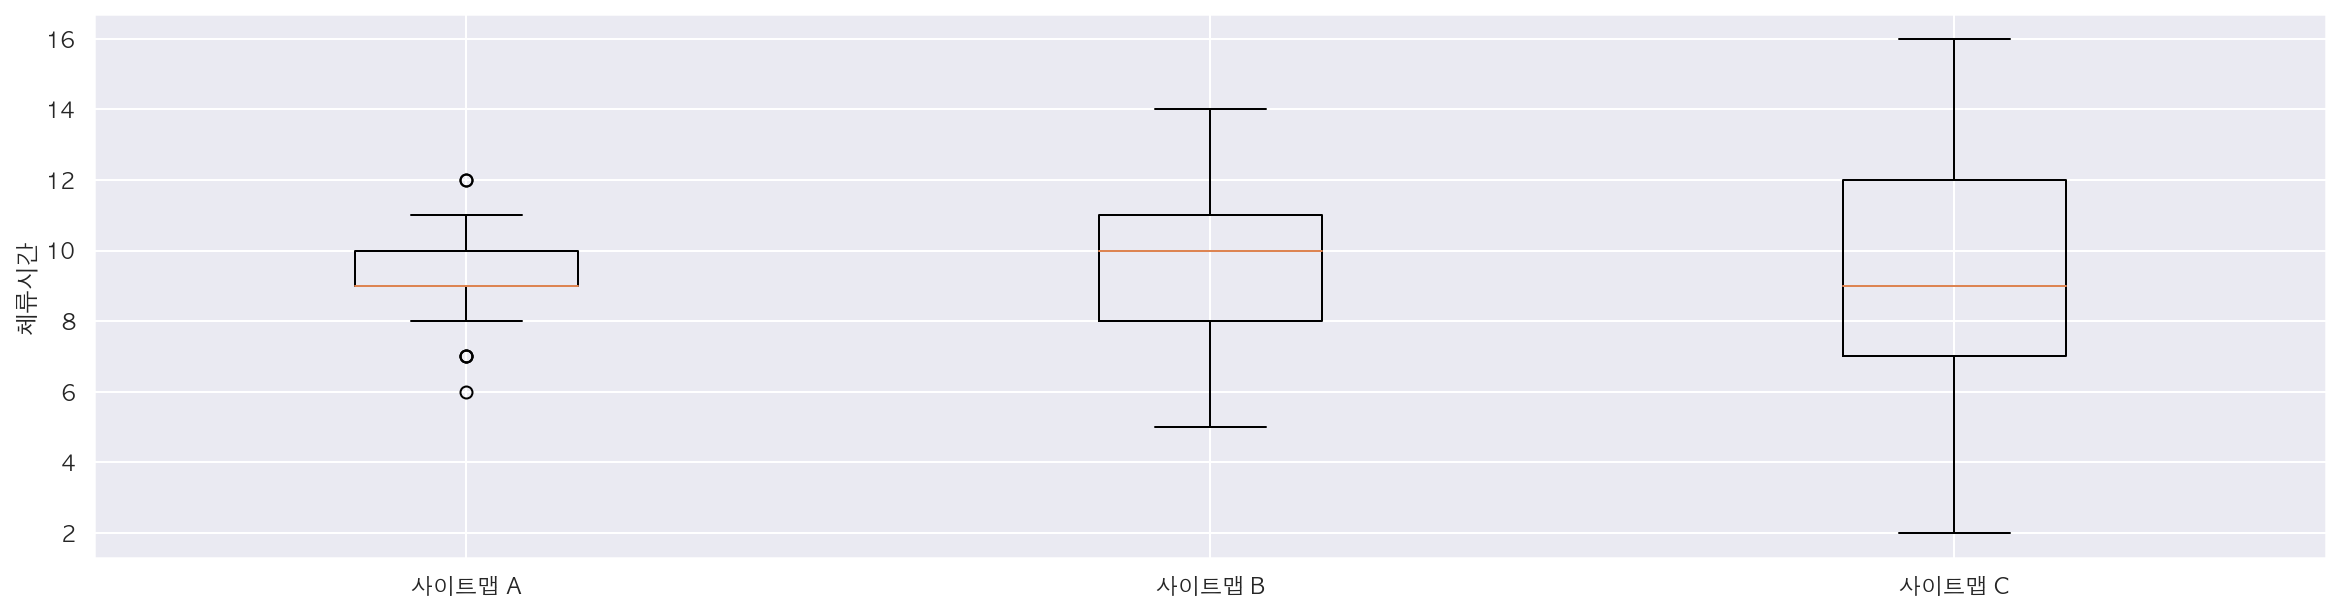

In [49]:
plt.boxplot([sitemap_A_time, sitemap_B_time, sitemap_C_time])
plt.xticks([1, 2, 3], ['사이트맵 A', '사이트맵 B', '사이트맵 C'])
plt.ylabel("체류시간")

In [50]:
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *
print(kstest(sitemap_A_time, 'norm'))
print(kstest(sitemap_B_time, 'norm'))
print(kstest(sitemap_C_time, 'norm'))

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
KstestResult(statistic=0.9999997133484281, pvalue=0.0)
KstestResult(statistic=0.9891262924445604, pvalue=1.320331854479069e-206)


In [52]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재하지 않음을 확인
print(f_oneway(sitemap_A_time, sitemap_B_time, sitemap_C_time))

F_onewayResult(statistic=1.6538817694924581, pvalue=0.19256727851054653)


#### Step 4. 할인 쿠폰의 효과 분석

In [53]:
df = pd.read_csv("할인쿠폰발행효과.csv", engine = "python", encoding='CP949')
df.head()

,고객ID,발행전 구매 횟수,발행후 구매 횟수
0,C-925,3,1
1,C-926,0,0
2,C-927,0,3
3,C-928,0,4
4,C-929,4,4


In [54]:
# 발행 전후 구매횟수 차이에 대한 통계 분석
(df['발행후 구매 횟수'] - df['발행전 구매 횟수']).describe()

count    154.000000
mean       1.259740
std        2.210507
min       -3.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        6.000000
dtype: float64

Text(0, 0.5, '구매 횟수')

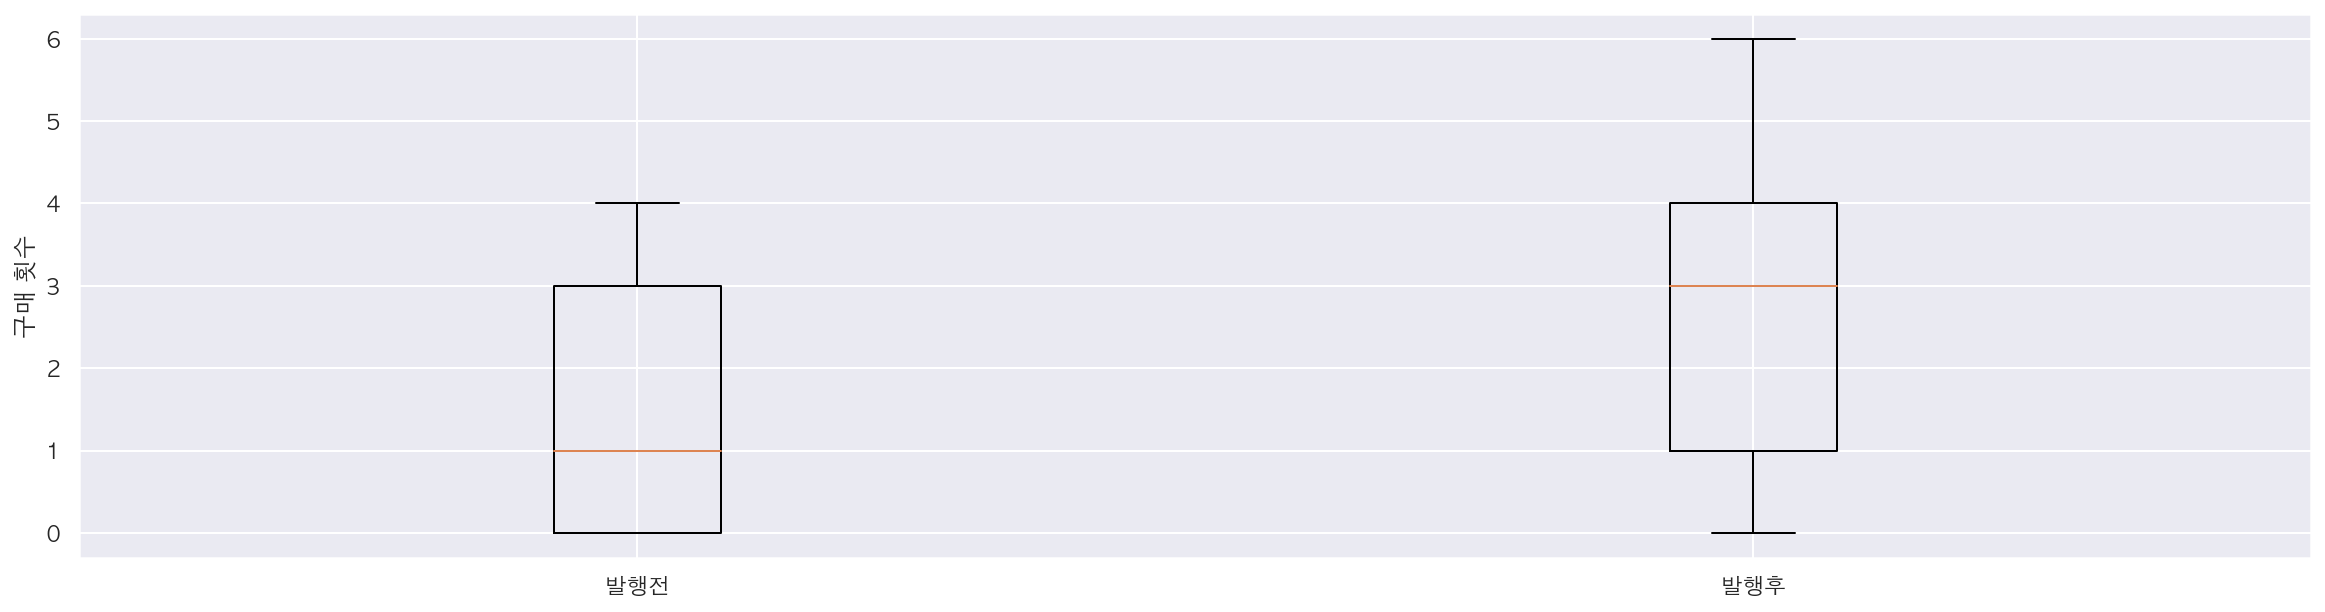

In [55]:
plt.boxplot([df['발행전 구매 횟수'], df['발행후 구매 횟수']])
plt.xticks([1, 2], ['발행전', '발행후'])
plt.ylabel("구매 횟수")

In [56]:
# 정규성 검정
kstest(df['발행후 구매 횟수'] - df['발행전 구매 횟수'], 'norm')

KstestResult(statistic=0.4253018161037688, pvalue=8.597340234980609e-26)

In [57]:
ttest_rel(df['발행후 구매 횟수'], df['발행전 구매 횟수'])

Ttest_relResult(statistic=7.07211673728211, pvalue=5.104217839308897e-11)

발행 후에 차이가 있다고 볼 수있다. 

#### Step 5. 체류 시간과 구매 금액 간 관계 분석

In [58]:
df = pd.read_csv("체류시간_구매금액.csv", engine = "python", encoding='CP949')
df.head()

,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='체류시간', ylabel='구매금액'>

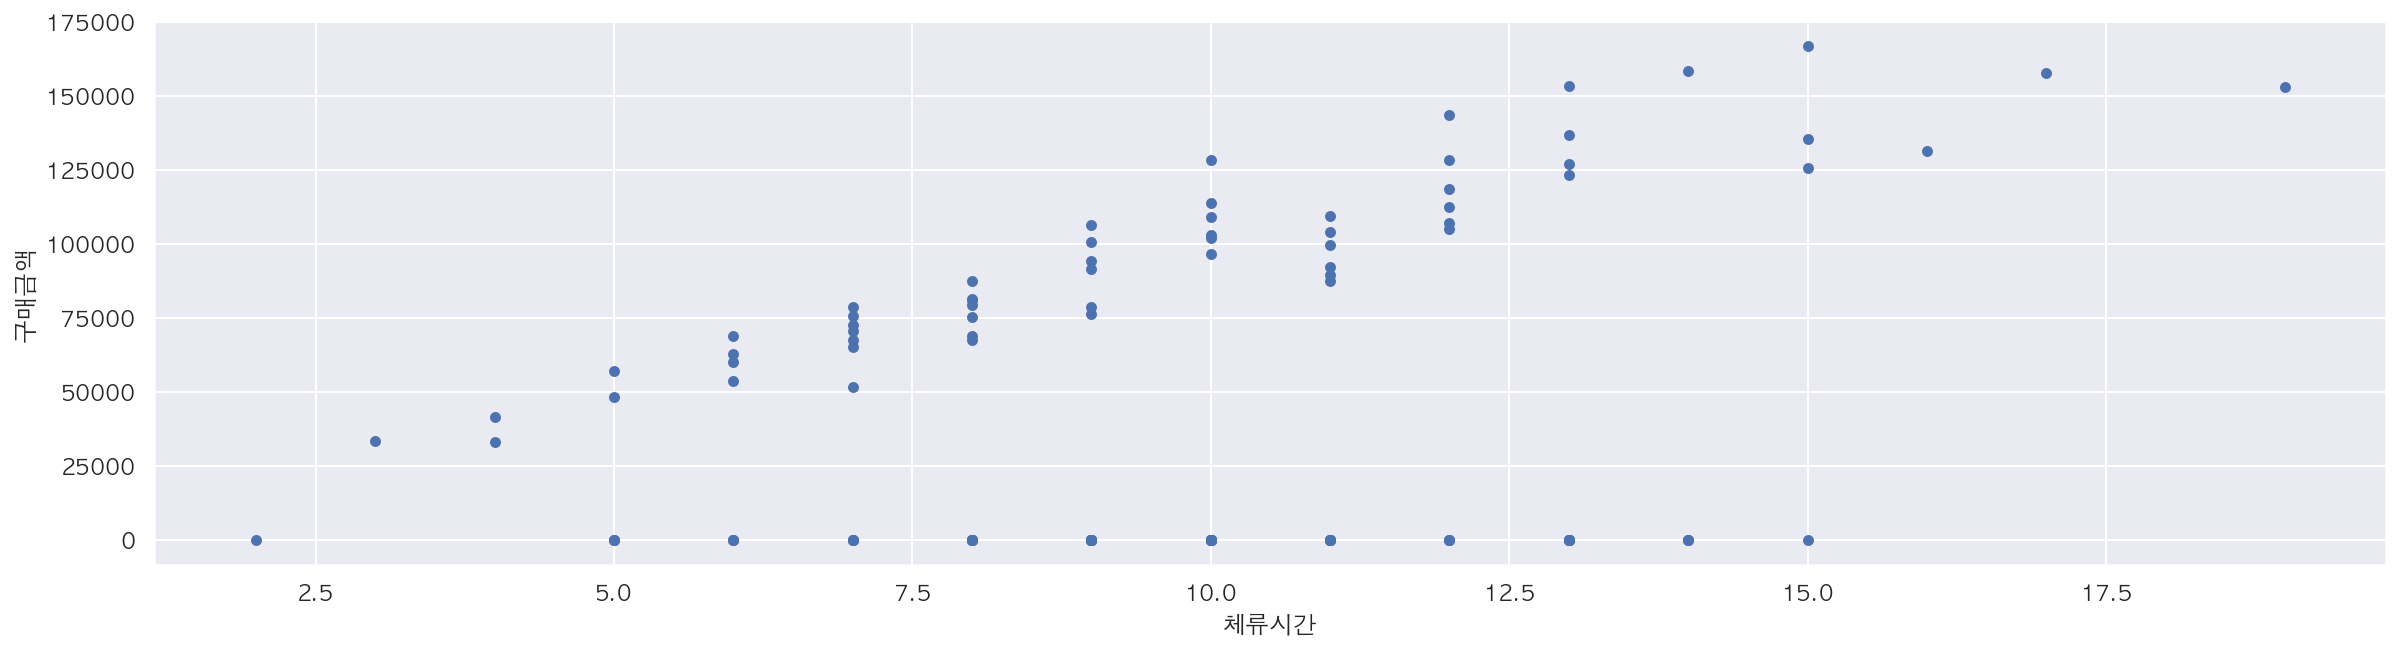

In [59]:
df.plot(kind = 'scatter', x = '체류시간', y = '구매금액')

In [60]:
df.corr(method = 'pearson')

,구매금액,체류시간
구매금액,1.000000,0.320852
체류시간,0.320852,1.000000


In [61]:
df.corr(method = 'spearman')

,구매금액,체류시간
구매금액,1.000000,0.229853
체류시간,0.229853,1.000000


In [62]:
df_without_zero = df.loc[df['구매금액'] != 0]
df_without_zero.corr(method = 'pearson')

,구매금액,체류시간
구매금액,1.000000,0.924526
체류시간,0.924526,1.000000


In [63]:
df_without_zero.corr(method = 'spearman')

,구매금액,체류시간
구매금액,1.000000,0.938099
체류시간,0.938099,1.000000


#### Step 6. 구매버튼 배치에 따른 구매율 차이 분석

In [65]:
df = pd.read_excel("구매여부_버튼타입_통계.xlsx")
df.head()

,구매여부,버튼타입,고객 수
0,구매,A,9
1,NaN,B,9
2,NaN,C,15
3,비구매,A,93
4,NaN,B,85


In [68]:
# ffill 결측값의 바로 윗 값으로 대체

df.fillna(method = 'ffill', inplace = True)

In [70]:
df

,구매여부,버튼타입,고객 수
0,구매,A,9
1,구매,B,9
2,구매,C,15
3,비구매,A,93
4,비구매,B,85
5,비구매,C,89


In [71]:
cross_table = pd.pivot_table(df, index = '구매여부', columns = '버튼타입', values = '고객 수')
cross_table

버튼타입,A,B,C
구매여부,,,
구매,9,9,15
비구매,93,85,89


In [72]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # pvalue가 0.38로 구매여부와 버튼타입 간에는 관계가 없음을 확인

0.38033325575735993
